# Practical 3:
> ## Generating Samples Of Gaussian Distributions

Submitted By:
- Aman Kumar
- 2019UCO1634
- CoE - 2

> Gaussian Sample Generation using Box-Mueller Transform



In [3]:
import sys
import random
import math

N=10000
random.seed(123)
epsilon = sys.float_info.epsilon

def box_muller():
    # Avoid getting u == 0.0
    u1, u2 = 0.0, 0.0
    while u1 < epsilon or u2 < epsilon:
        u1 = random.random()
        u2 = random.random()
        
    n1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    n2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return n1, n2

In [4]:
# Use KS to test

samples = [box_muller() for x in range(N)]

sample_x = [samples[i][0] for i in range(N)]
sample_y = [samples[i][1] for i in range(N)]

sample_N(0,1) vs. N(0, 1): KS=0.0074 with p-value = 0.6344.


<Axes: ylabel='Frequency'>

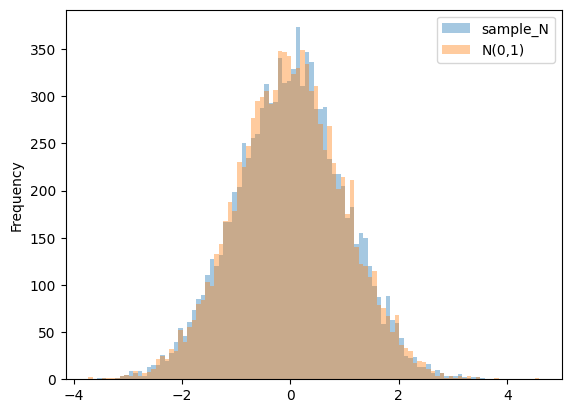

In [5]:
# for sample_x
from scipy import stats
%matplotlib inline
import pandas as pd

test_stat, pvalue = stats.kstest(sample_x, 'norm', args=(0, 1), N=N)
print("sample_N(0,1) vs. N(0, 1): KS=%.4f with p-value = %.4f." % (test_stat, pvalue))

# Plot our samples against our reference distribution
reference = [stats.norm.rvs() for x in range(N)]
pd.DataFrame({'sample_N': sample_x, 'N(0,1)': reference}).plot(kind='hist', bins=100, alpha=0.4)

sample_N(0,1) vs. N(0, 1): KS=0.0106 with p-value = 0.2071.


<Axes: ylabel='Frequency'>

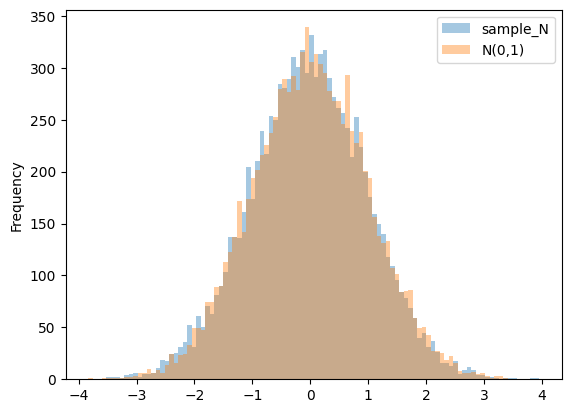

In [6]:
# for sample_y
test_stat, pvalue = stats.kstest(sample_y, 'norm', args=(0, 1), N=N)
print("sample_N(0,1) vs. N(0, 1): KS=%.4f with p-value = %.4f." % (test_stat, pvalue))

# Plot our samples against our reference distribution
reference = [stats.norm.rvs() for x in range(N)]
pd.DataFrame({'sample_N': sample_y, 'N(0,1)': reference}).plot(kind='hist', bins=100, alpha=0.4)